In [112]:
# Harshit Agrawal Student 598318

# Restricted Boltzman Machines and Unsupervised Data Reconstruction

Boltzmann Machines (BMs) are a particular form of energy-based models which typically contain hidden variables. A Boltzmann machine is fully connected within and between layers, whereas, Restricted Boltzmann Machines (RBM) have no 
intra-layer communication. RBM has an undirected graph model and a two layer neural net with visible units in one part of the graph (visible layer) and hidden units in the other part (hidden layer). No connection within layers results in that the random variables encoded by one layer are conditionally independent given the states of the other layer. 

RBMs are able to learn to reconstruct the data by themselves in an unsupervised fashion, for example by making several forward and backward passes between the visible layer and the hidden layer, without involving a deeper network. In some cases (i.e, in the demo), RBM models can also be perceived as autoencoders with stochastic units which have particular probability distributions.

Figure below illustrates an example model of a Restricted Boltzmann Machine with $I$ visible nodes and $J$ hidden nodes. Weights on the undirected edges in the figure are omitted for clarity. Each visible node takes in a representation of low-level feature from an item in the dataset to be learned. For example, from a dataset of grayscale images, each visible node would receive one pixel-value for each pixel in one image. 

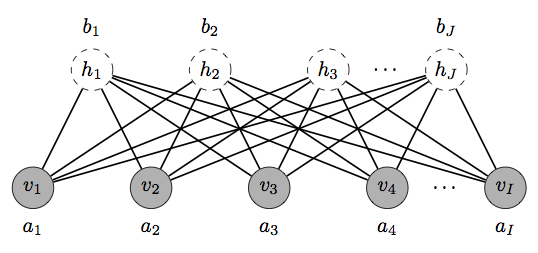

In [72]:
from IPython.display import Image as DImage
DImage(filename='rbm_demo.png',height=150,width=500)

Using the visible nodes ${v}_i$ with biases $a_{i}$, hidden nodes $h_j$ with biases $b_j$ and connection weights $w_{i,j}$,  we can define the **energy** function of a Bernoulli-Bernoulli (Binary) RBM network as:

$$ E(\mathbf{v},\mathbf{h}) = - \mathbf{v}^T\mathbf{W}\mathbf{h} - \mathbf{b}^T\mathbf{h} - \mathbf{a}^T\mathbf{v} $$

$$ E(\mathbf{v},\mathbf{h})  = -\sum_{j=1}^{J} \sum_{i=1}^{I}W_{i,j}h_j v_i - \sum_{j=1}^{J}b_{j} h_j - \sum_{i=1}^{I}a_{i} v_i$$

Then the probability distribution of the whole model (joint probability) is written as:
$$P(\mathbf{v},\mathbf{h}) = \frac{e^{-E(\mathbf{v},\mathbf{h})}}{Z},$$
where $Z$ is a normalizing constant so that the sum of all events = 1.
We can get the marginal distribution $P(\mathbf{v})$ by summing over $\mathbf{h}$:
$$P(\mathbf{v}) = \sum_{\mathbf{h}} P(\mathbf{v},\mathbf{h}) = \sum_{\mathbf{h}} \frac{e^{-E(\mathbf{v},\mathbf{h})}}{Z}.$$
**The free energy of the visible units** can be calculated analytically without resorting to brute force summation:
$$ F(\mathbf{v}) = -\ln \left(\sum_{\mathbf{h}}e^{-E(\mathbf{v},\mathbf{h})}\right) = -\sum_{i}v_ia_i - \sum_{j}\log(1 + \exp(b_j + \sum_{i}W_{i,j}v_i))$$
The free energy derivation in the sample code (RBM.py) can be seen as an application of a general sum-product algorithm using conditional independence properties to do efficient inference in graphical models. [Belief propagation](https://en.wikipedia.org/wiki/Belief_propagation) is quite common for free energy approximation.

When we sample the hidden variables given the visible variables, we need conditional probability. An analogous expression can be derived for sampling visible units, too. If binary units are used for hidden and visible layers, we can define the conditional probabilities and the usual neuron activation function with a probabilistic model:

$$P(h_j=1|\mathbf{v}) = sigm(\mathbf{W}_{:,j}^T \mathbf{v} + b_j)$$

$$P(v_i=1|\mathbf{h}) = sigm(\mathbf{W}_{i,:}\mathbf{h} + a_i)$$

where the $\mathbf{W}_{:,j}$ is the column vector and $\mathbf{W}_{i,:}$ is the row vector of the weight matrix. Thus, RBM networks can be nicely related to neural network model running also backwards, and $P(h_j=1|\mathbf{v})$ is considered as learned features. 

For the RBM training, we typically can not tune network parameters (weights and biases) by maximizing the log likelihood:
$$argmax_{\mathbf{W},\mathbf{a},\mathbf{b}}\mathbb{E}\left[\sum \log P(\mathbf{v})\right],$$
because such is intractable.

RBM training can be based on a learning algorithm called **k step contrastive divergence (CD-k)** to generate samples that are needed to calculate an estimate of the gradient of the log-likelihood. CD-k performs Gibbs sampling which is initialized with a training example $\mathbf{v}_0$ on the training set and returns the sample $\mathbf{v}_k$ after k sampling steps. Each step consists of sampling $\mathbf{h}(t)$ from $P(\mathbf{h}|\mathbf{v}(t))$ and sampling $\mathbf{v}(t+1)$ from $P(\mathbf{v}|\mathbf{h}(t))$ subsequently. In the demo, the back-and-forth sampling is done by the Theano [*scan( )*](http://deeplearning.net/software/theano/library/scan.html) function.

**Persistent contrastive divergence (PCD)** has been proposed to produce better approximations of log-likelihood gradient by replacing the sample $\mathbf{v}_k$ with a sample from a Gibbs chain that is independent from the sample $\mathbf{v}_0$ of the training distribution.

### Demo:
This demo introduces a Theano implementation for RBMs using the MNIST dataset with a smaller version of the images. The code for constructing the RBM is taken from the [deep learning tutorial](http://deeplearning.net/tutorial/rbm.html) and modified for you. Our RBM model has one binary visible and one hidden layer of nodes (similar to the figure above).

In this demo, we will use 'mnist-small.pkl.gz' with 14x14 images. The reason for dataset modification is due to the limited memory in CSC notebook. If you want, you can test the demo with the original dataset by using your own computer or in the computer classrooms. 

We will experiment with both CD and PCD for RBM training. In the case of CD-k, we will use the reconstruction cost as the monitoring cost. In PCD-k, the pseudo likelihood cost will be used as the monitoring cost, which is basically computing the free energy on V, then on a randomly corrupted version of V, and returning the log of the logistic function of the difference.

Before beginning the assignment, if you need more help to understand RBMs or mathemathical expressions behind it you can visit these pages:

* [An Introduction
to Restricted Boltzmann Machines](http://image.diku.dk/igel/paper/AItRBM-proof.pdf)
* [Small Binary RBM on MNIST](http://pydeep.readthedocs.io/en/documentation/tutorials/RBM_MNIST_small.html)
* [Coursera Course by Geoffrey Hinton on RBM](https://www.youtube.com/watch?v=UcAWwySuUZM&t=6s)
* [A Practical Guide to Training Restricted Boltzmann Machines](http://www.cs.toronto.edu/~hinton/absps/guideTR.pdf)
* [Boltzmann machines (Scholarpedia article)](http://www.scholarpedia.org/article/Boltzmann_machine)
* [Product of experts (Scholarpedia article)](http://www.scholarpedia.org/article/Product_of_experts)

### Assignment:
In the assignment, you first train an RBM model as in the demo. Then you will do both (so-called) unconstrained and constrained synthesis from the model. Then, you will implement a masking function to fix *(or clamp)* some of the visible units to given values as visualized with the squared units in the figure below. With mask, you will fix a part of the Gibbs samples and the trained RBM model guesses the other pixels by also using the information on these fixed visible units. We can define this problem as reconstruction of an incomplete image by sampling from an RBM. The masking options will look like the grid figures below with five options:
mask up, down, left, right and random pixels.

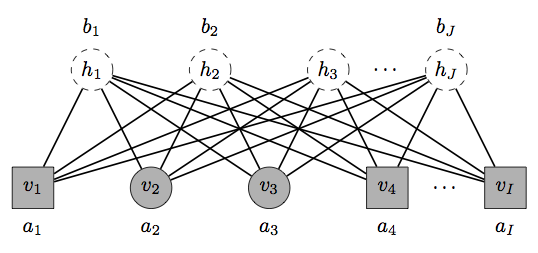

In [73]:
DImage(filename='rbm_assignment.png',height=150,width=500)

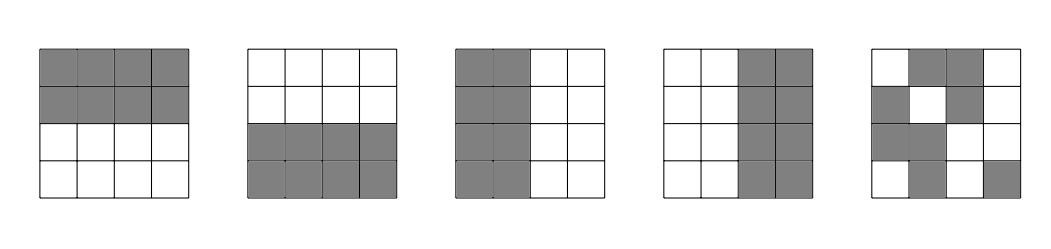

In [74]:
DImage(filename='masks.png',height=200,width=600)

You need to fill *vhv_clamping_mask()* function which is going to be used for testing the RBM model with a test dataset and sampling the dataset by Gibbs sampling. Remember that each MNIST image is represented as a vector, so they have the shape of $(14x14,)$ You also need to change the *gibbs_vhv_clamped()* function inside the RBM.py so that it gets the mask defined in the *vhv_clamping_mask()* and masks the inputs given as *v0_mean* and *v0_sample*. You do not need to return the whole RBM.py file for the assignment, just return the updated function by copy-pasting the code to a snippet at the end of this assignment in the Markdown mode. 

You will also experiment with different initializing methods for the unmasked region of the clamped samples. In addition to keeping the masked region same, you will add noise to the unmasked part of the initial Gibbs samples. You will use Bernoulli distribution to generate the noisy data which takes the value $\{0,1\}$ for each pixel with probabilities $\{p, (1-p)\}$. In the assignment, you will initialize this probability value with different methods and by using the pixelwise information of the training dataset.

In [75]:
# IMPORTANT NOTE! 
# when run in CSC notebooks, one has to first create a terminal and run:
# pip install Pillow

import time
import math
import timeit
import numpy
import theano
import theano.tensor as T
import os, sys
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
from PIL import Image
import matplotlib.pyplot as plt

rng = numpy.random.RandomState(123)
theano_rng = RandomStreams(rng.randint(2 ** 30))

from exercise_helper import tile_raster_images
from exercise_helper import load_data
from exercise_helper import plot_row
from exercise_helper import plot_mask
from exercise_helper import plot_image

import RBM
print('...Import completed...')

...Import completed...


First, we will create an RBM object and train it on our training set.

In [76]:
def train_rbm(train_data, n_hidden, 
               learning_rate, batch_size,
               initialize_chain, n_Gibbs_steps,
               training_epochs=10, output_folder='rbm_plots'):
    
    # Inputs
    # train_data : dataset to be passed, 
    #              in our case we will pass the training samples 
    #              from the 'mnist.small.pkl.gz'
    # n_hidden : number of hidden units in the RBM
    # learning_rate : learning rate used for training the RBM
    # batch_size : size of a batch used to train the RBM
    # initialize_chain : string to define CD for contrastive divergence
    #                    or PCD for persistent contrastive divergence
    # n_Gibbs_steps : number of Gibbs steps to do in CD-k/PCD-k
    # training_epochs : number of epochs used for training
    
    # output_folder: folder to be filled with filters at each epoch
    #                and sample mean fields

    # Outputs
    # rbm    : trained RBM model
    # filters: filters (weights) after the RBM training 

    # compute the dimensions of input data
    # D: dimension of one sample
    # L: number of training samples
    D = train_data.get_value(borrow=True).shape[1]
    L = train_data.get_value(borrow=True).shape[0]
    # get the dimensiond from D with square root
    # with smaller MNIST dataset ddim will be 14
    ddim = int(math.sqrt(D))
    assert ddim * ddim == D
    print('dataset has a dimension of %d x %d' %(ddim, ddim))
    
    # compute number of minibatches for training
    n_train_batches = train_data.get_value(borrow=True).shape[0] // batch_size

    # allocate symbolic variables for the data
    index = T.lscalar()    # index to a [mini]batch
    x = T.matrix('x')  # the data is presented as rasterized images

    # construct the RBM class 
    rbm = RBM.RBM(input=x, n_visible=ddim * ddim,
                  n_hidden=n_hidden, numpy_rng=rng, theano_rng=theano_rng)
    
    # initialize storage for the persistent chain (state = hidden
    # layer of chain)
    if initialize_chain == 'PCD':
        print("the monitoring cost will show the pseudo likelihood cost")
        persistent_chain = theano.shared(numpy.zeros((batch_size, n_hidden),
                                         dtype=theano.config.floatX),
                                         borrow=True)

        # get the cost and the gradient corresponding to one step of PCD-n_Gibbs_steps
        cost, updates = rbm.get_cost_updates(lr=learning_rate,
                                             persistent=persistent_chain, 
                                             k=n_Gibbs_steps)
    elif initialize_chain == 'CD':
        print("the monitoring cost will show the reconstruction cost")
        # get the cost and the gradient corresponding to one step of CD-n_Gibbs_steps
        cost, updates = rbm.get_cost_updates(lr=learning_rate, 
                                             k=n_Gibbs_steps)

    # create folder for output images
    if not os.path.isdir(output_folder):
        os.makedirs(output_folder)
    os.chdir(output_folder)
    
    # create a Theano function to train the RBM
    # the purpose of train_rbm is solely to update the RBM parameters
    train_rbm = theano.function(
        [index],
        cost,
        updates=updates,
        givens={
            x: train_set_x[index * batch_size: (index + 1) * batch_size]
        },
        name='train_rbm'
    )

    plotting_time = 0.
    start_time = timeit.default_timer()
    
    # go through training epochs
    for epoch in range(training_epochs):

        # go through the training set
        mean_cost = []
        for batch_index in range(n_train_batches):
            mean_cost += [train_rbm(batch_index)]

        print('Training epoch %d, cost is ' % epoch, numpy.mean(mean_cost))
        # Plot filters after each training epoch
        plotting_start = timeit.default_timer()
        # Construct image from the weight matrix
        weights =  tile_raster_images(
                X=rbm.W.get_value(borrow=True).T,
                img_shape=(ddim, ddim),
                tile_shape=(10, 10),
                tile_spacing=(1, 1)
            )
        image = Image.fromarray(weights)
        image.save('filters_at_epoch_%i.png' % epoch)
        plotting_stop = timeit.default_timer()
        plotting_time += (plotting_stop - plotting_start)
        
    end_time = timeit.default_timer()
    pretraining_time = (end_time - start_time) - plotting_time
    print ('Training took %f minutes' % (pretraining_time / 60.))
    os.chdir('../')
    return rbm, weights
    

In [77]:
# load the MNIST dataset
dataset = 'mnist-small.pkl.gz'
datasets = load_data(dataset)

train_set_x, train_set_y = datasets[0]
test_set_x, test_set_y = datasets[2]
print('smaller MNIST dataset:')
print('%d samples for the training set' %train_set_x.get_value(borrow=True).shape[0])
print('%d samples for the test set' %test_set_x.get_value(borrow=True).shape[0])

... loading data
dataset is loaded
smaller MNIST dataset:
10000 samples for the training set
1000 samples for the test set


#### <span style="color:red">Assignment part 1: 
Fill the function below according to the task explained above. Remember, you also need to change *gibbs_vhv_clamped()* function inside the RBM.py .

In [78]:
def vhv_clamping_mask(ddim, n_chains, n_clamps, place):
    # Inputs:
    # ddim: dimension of the input 
    # n_chains: number of parallel Gibbs chains to be used for sampling
    # n_clamps : number for pixels set to 1 in clamping
    # place: place for where the clamping is True (1)
    
    # Outputs:
    # mask: mask for clamping. It should have a size of (ddim*ddim,)
    # for MNIST images
    ###################################################################
    ###################### INSERT YOUR CODE HERE ######################
    ###################################################################
    mask = numpy.zeros((ddim*ddim,))
    if place == 'bottom': 
        # the bottom placement is given to you as a hint for other 
        # placement implementations
        dim_up = ddim-n_clamps
        dim_down = n_clamps
        mask = numpy.concatenate((
                                numpy.zeros((ddim*dim_up,)), 
                                numpy.ones((ddim*dim_down,))), axis=0)
    elif place == 'top':
        # hint: use numpy concatenate() to create mask
        # dim_up should include ones, dim_down should include zeros
         dim_up = n_clamps
         dim_down = ddim-n_clamps
         mask = numpy.concatenate((
                                numpy.ones((ddim*dim_up,)), 
                                numpy.zeros((ddim*dim_down,))), axis=0)
    elif place == 'left':
        # hint: first create one row with numpy concatenate()
        #       then use numpy tile() to construct the array by 
        #       repeating a the number of times given by ddim
        # dim_left should include ones, dim_right should include zeros
         dim_left = n_clamps
         dim_right = ddim-n_clamps
         row_mask = numpy.concatenate((
                                numpy.ones((dim_left,)), 
                                numpy.zeros((dim_right,))), axis=0)
         mask =numpy.tile(row_mask,(1,ddim))      
    elif place == 'right':
        # hint: first create one row with numpy concatenate
        #       then use numpy tile to construct the array by 
        #       repeating a the number of times given by ddim
        # dim_left should include zeros, dim_right should include ones
          dim_left = ddim-n_clamps
          dim_right = n_clamps
          row_mask = numpy.concatenate((
                                numpy.zeros((dim_left,)), 
                                numpy.ones((dim_right,))), axis=0)
          mask =numpy.tile(row_mask,(1,ddim))
        
    elif place == 'random':
        # hint use numpy randint function for returning random integers 
        mask = numpy.zeros((ddim*ddim,))
        rng = numpy.random.RandomState(123)
        on = rng.randint(0, ddim*ddim, (n_clamps,))
        mask[on] = 1
                          
    return mask
    ###################################################################
    ############################ END ##################################
    ###################################################################

After the training, we will test our RBM model using test data with Gibbs sampling.

In [132]:
def test_rbm(rbm, test_data, n_chains, n_samples, 
             n_Gibbs_steps, plot_every= 1000, 
             n_clamps= 0, place=None, noise_init=None, train_data=None):
    
    # Inputs:
    # rbm : trained rbm model 
    # test_data : dataset to be passed for test, 
    #              in our case we will pass the testing samples 
    #              from the 'mnist.small.pkl.gz'
    # n_chains : number of parallel Gibbs chains to be used for sampling
    # n_samples : number of samples to plot for each chain
    # n_Gibbs_steps : number of Gibbs steps to do in CD-k/PCD-k
    # plot_every : it generates "plot_every" intermediate steps
    #             (every successible samples) that are discarded 
    #             in Gibbs sampling
    # n_clamps : number for pixels used in clamping
    #            if zero, no clamping
    #            if bigger than zero, then RBM will be reconstructed 
    #            with a pattern
    # n_clamps : number for pixels used in clamping
    # place: place for clamping starts

    # Outputs:
    # original_samples : samples starting the Gibbs chain
    # image_data : Gibbs samples generated by the RBM after training
    #             each row in the output represents a mini-batch 
    #             of negative particles
    # clamping_mask : masking pattern for clamping
    
    # sampling from the RBM
    # find out the number of test samples
    number_of_test_samples = test_data.get_value(borrow=True).shape[0]
    # compute the dimensions of input data
    # D: dimension of one sample
    # L: number of training samples
    D = test_data.get_value(borrow=True).shape[1]
    L = test_data.get_value(borrow=True).shape[0]
    # get the dimensiond from D with square root
    # with smaller MNIST dataset ddim will be 14
    ddim = int(math.sqrt(D))
    assert ddim * ddim == D
    
    # pick random test examples, with which to initialize the persistent chain
    test_idx = rng.randint(number_of_test_samples - n_chains)
    persistent_vis_chain = theano.shared(
        numpy.asarray(
            test_set_x.get_value(borrow=True)[test_idx:test_idx + n_chains],
            dtype=theano.config.floatX
        )
    )
    #persistent_vis_chain_sample = numpy.asarray(
    #        test_data.get_value(borrow=True)[test_idx:test_idx + n_chains],
    #        dtype=theano.config.floatX)
    
    # get the initialized test examples as an output, since
    # the states of the visible units are initialized to test data

    original_samples = tile_raster_images(
                        X=persistent_vis_chain.get_value(borrow=True),
                        img_shape=(ddim, ddim),
                        tile_shape=(1, n_chains),
                        tile_spacing=(1, 1)
                        )

    ###################################################################
    ###################### INSERT YOUR CODE HERE ######################
    ###################################################################
    
    # initialize the first sample of Gibbs chain 
    # with a noise sampled from the Bernoulli distribution 
    # the noisy representations will only be used with clamping operations
    # if noise_init is 'equal expectation', samples are drawn from a 
    # binomial distribution with p=0.5 (an equal probability of success)
    # noisy_persistent_vis_chain is now consists of Bernoulli noise with a dimension of 
    # (ddim*ddim,)
    
    # Hint: use numpy Binomial function with size=(ddim*ddim, ), n=1 trial
    # and p=0.5 for equal expectation 
    
    if noise_init == 'equal_expectation':
        noise = numpy.random.binomial(1, 0.5, (ddim*ddim,))
        
    # if noise_init is selected as "global_expectation", calculate the averaging
    # pixel values as a one global value (global_mean) over examples and over 
    # pixels of the whole training dataset. Use this average value for p to 
    # construct a noise withdimensions of (ddim*ddim,) sampled from the Bernoulli 
    # distribution
    
    elif noise_init == 'global_expectation':
        global_mean = T.mean(train_data, axis=None).eval()
        noise = numpy.random.binomial(1,global_mean, (ddim*ddim,))
        
    # if the noise init is selected as "local_expectation", calculate the averaging
    # pixel values as (ddim*ddim,) values (local_mean) over examples of the whole 
    # training dataset 
    # Use this average value per each pixel (ddim*ddim) for p to construct a noise with 
    # dimensions of (ddim*ddim,) sampled from the Bernoulli distribution
    
    elif noise_init == 'local_expectation':
        local_mean = train_data.mean(0).eval()
        noise = numpy.random.binomial(1,local_mean, (ddim*ddim,))

    ###################################################################
    ############################ END ##################################
    ################################################################### 
        
    # define one step of Gibbs sampling (mf = mean-field) define a
    # function that does 'plot_every' steps before returning the
    # sample for plotting
    # if there is clapping, then change the initialization of both vis_mfs
    # and vis_samples to persistent_vis_chain shared Theano variable. This
    # trick will keep the masked part of the image same and try to guess the
    # other part of the image from (noisy) the input
    # otherwise, initialize only vis_samples to persistent_vis_chain variable
    # use gibss_vhv_clamped function, if the clamping is applied
    if n_clamps > 0:
        clamping_mask = vhv_clamping_mask(ddim, n_chains, n_clamps, place)
        if noise_init is None:
            persistent_vis_chain_clamped = persistent_vis_chain
        else:
            persistent_vis_chain_clamped = (noise*(1-clamping_mask) + 
                                persistent_vis_chain*(clamping_mask))
        (
            [
                presig_hids,
                hid_mfs,
                hid_samples,
                presig_vis,
                vis_mfs,
                vis_samples
            ],
            updates
        ) = theano.scan(
            rbm.gibbs_vhv_clamped,
            non_sequences = clamping_mask,
            outputs_info=[None, None, None, None, 
                          persistent_vis_chain_clamped, persistent_vis_chain_clamped],
            n_steps=plot_every,
            name="gibbs_vhv_clamped"
        )
    else:
        clamping_mask = numpy.zeros((ddim,ddim), dtype=theano.config.floatX)
        (
            [
                presig_hids,
                hid_mfs,
                hid_samples,
                presig_vis,
                vis_mfs,
                vis_samples
            ],
            updates
        ) = theano.scan(
            rbm.gibbs_vhv,
            outputs_info=[None, None, None, None, None, persistent_vis_chain],
            n_steps=plot_every,
            name="gibbs_vhv"
        )
    
    # add to updates the shared variable that takes 
    # care of our persistent chain
    updates.update({persistent_vis_chain: vis_samples[-1]})
    # construct the function that implements our persistent chain.
    # we generate the "mean field" activations for plotting and the actual
    # samples for reinitializing the state of our persistent chain
    sample_fn = theano.function(
        [],
        [
            vis_samples[0],
            vis_mfs[-1],
            vis_samples[-1]
        ],
        updates=updates,
        name='sample_fn'
    )
    
    # create a space to store the image for plotting (we need to leave
    # room for the tile_spacing as well)
    image_data = numpy.zeros(
        ((ddim+1) * n_samples, (ddim+1) * n_chains),
        dtype='uint8'
    )
    for idx in range(n_samples):
        # generate 'plot_every' intermediate samples that we discard,
        # because successive samples in the chain are too correlated
        vis_mf0, vis_mf, vis_sample = sample_fn()
        # string for output
        s = ' ... plotting sample ' + str(idx)                   
        print (s, end="\r")
        # sleep for 200ms to rewrite the comment above
        time.sleep(0.2) 
        image_data[(ddim+1) * idx:(ddim+1) * idx + ddim, :] = tile_raster_images(
            X=vis_mf,
            img_shape=(ddim, ddim),
            tile_shape=(1, n_chains),
            tile_spacing=(1, 1)
        )
        
    # find the first clamped samples and rasterize
    clamped_samples = tile_raster_images(
                        X=vis_mf0,
                        img_shape=(ddim, ddim),
                        tile_shape=(1, n_chains),
                        tile_spacing=(1, 1)
                        )
    
    ## construct image
    image = Image.fromarray(image_data)
    return original_samples, image_data, clamping_mask.reshape(ddim, ddim), clamped_samples

In the demo, we will first try out the CD-1 since it is relatively cheap. Then, we will experiment with CD-15, PCD-1 and PCD-15. 

CD-1 sampling, without clamping
dataset has a dimension of 14 x 14
the monitoring cost will show the reconstruction cost
Training epoch 0, cost is  -42.7901076268
Training epoch 1, cost is  -37.8378468198
Training epoch 2, cost is  -36.8950274788
Training epoch 3, cost is  -36.340249363
Training epoch 4, cost is  -35.977715364
Training epoch 5, cost is  -35.650949935
Training epoch 6, cost is  -35.4658980016
Training epoch 7, cost is  -35.227407462
Training epoch 8, cost is  -35.076185063
Training epoch 9, cost is  -34.9567619635
Training took 0.104408 minutes


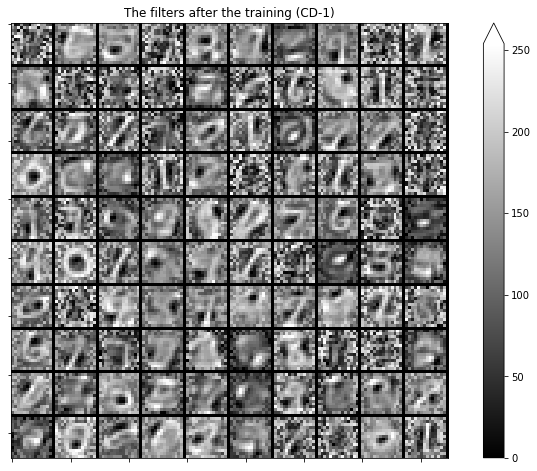

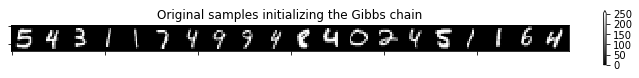

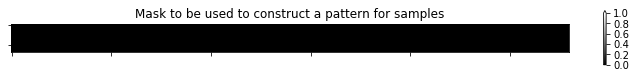

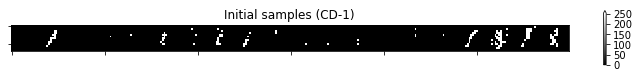

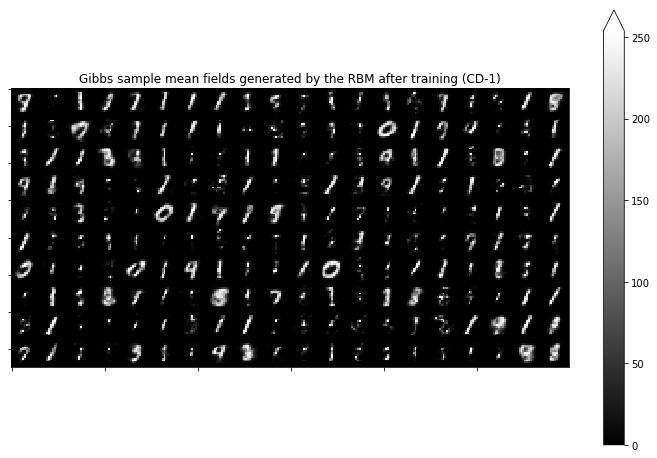

In [80]:
# define hyperparameters
n_hidden= 100
learning_rate = 0.1
batch_size = 20
n_chains=20
n_samples=10
n_clamps = 0
plot_every = 1000

# CD-1 sampling, without clamping
# select 'CD or PCD' to initialize the chain
initialize_chain = 'CD'
n_Gibbs_steps = 1
print('CD-1 sampling, without clamping')
rbmCD1, filters = train_rbm(train_set_x, n_hidden, learning_rate,
                        batch_size, initialize_chain,
                        n_Gibbs_steps, training_epochs=10, 
                        output_folder='rbm_plots_CD1_noclamp')
plot_image(filters, 'The filters after the training (CD-1)')

original_samples, sample_mean_fields, clamping_mask, clamped_samples = test_rbm(
                                                               rbmCD1, test_set_x, 
                                                               n_chains, n_samples, 
                                                               n_Gibbs_steps, 
                                                               plot_every, n_clamps, 
                                                               place=None)
plot_row(original_samples, 
         'Original samples initializing the Gibbs chain') 
plot_mask(clamping_mask, n_chains, 
          'Mask to be used to construct a pattern for samples')
plot_row(clamped_samples, 'Initial samples (CD-1)')
plot_image(sample_mean_fields, 
           'Gibbs sample mean fields generated by the RBM after training (CD-1)')

CD-15 sampling, without clamping
dataset has a dimension of 14 x 14
the monitoring cost will show the reconstruction cost
Training epoch 0, cost is  -70.4910922266
Training epoch 1, cost is  -67.5367860796
Training epoch 2, cost is  -66.6952806723
Training epoch 3, cost is  -66.8198384945
Training epoch 4, cost is  -66.3664813389
Training epoch 5, cost is  -66.1434003331
Training epoch 6, cost is  -65.9286741542
Training epoch 7, cost is  -65.8319482253
Training epoch 8, cost is  -65.8775333402
Training epoch 9, cost is  -65.5399303991
Training took 0.995687 minutes


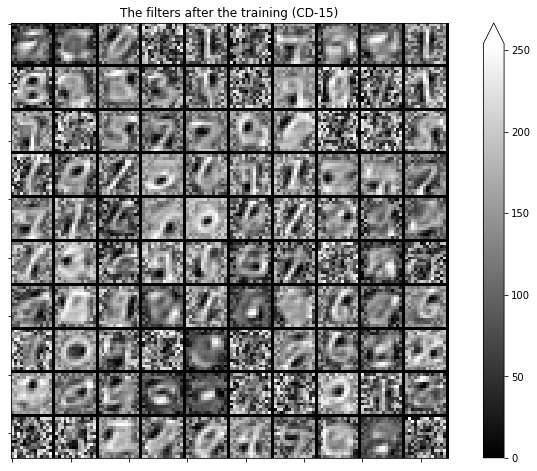

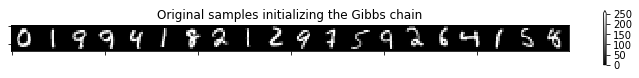

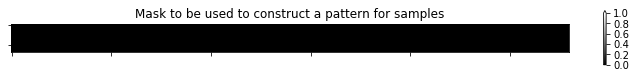

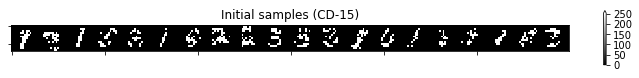

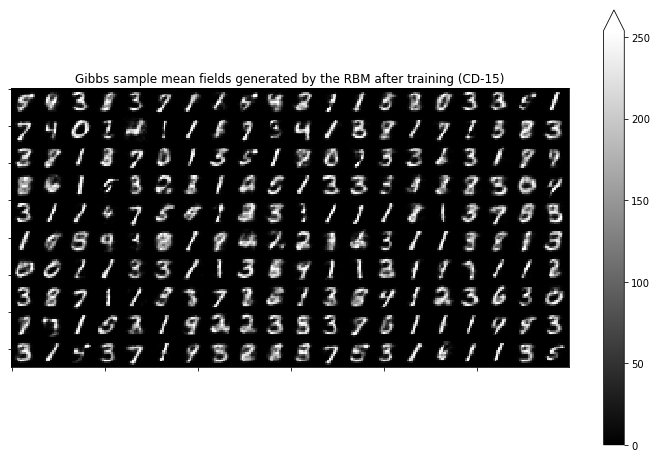

In [81]:
# CD-15 sampling, without clamping
# select 'CD or PCD' to initialize the chain
initialize_chain = 'CD'
n_Gibbs_steps = 15

print('CD-15 sampling, without clamping')
rbmCD15, filters = train_rbm(train_set_x, n_hidden, learning_rate,
                        batch_size, initialize_chain,
                        n_Gibbs_steps, training_epochs=10, 
                        output_folder='rbm_plots_CD15_noclamp')
plot_image(filters, 'The filters after the training (CD-15)')

original_samples, sample_mean_fields, clamping_mask, clamped_samples = test_rbm(
                                                               rbmCD15, test_set_x, 
                                                               n_chains, n_samples, 
                                                               n_Gibbs_steps, 
                                                               plot_every, n_clamps, 
                                                               place=None)
plot_row(original_samples, 'Original samples initializing the Gibbs chain') 
plot_mask(clamping_mask, n_chains, 'Mask to be used to construct a pattern for samples')
plot_row(clamped_samples, 'Initial samples (CD-15)')
plot_image(sample_mean_fields, 
           'Gibbs sample mean fields generated by the RBM after training (CD-15)')

PCD-1 sampling, without clamping
dataset has a dimension of 14 x 14
the monitoring cost will show the pseudo likelihood cost
Training epoch 0, cost is  -40.4868298911
Training epoch 1, cost is  -34.0771783603
Training epoch 2, cost is  -35.1455773997
Training epoch 3, cost is  -30.1172945228
Training epoch 4, cost is  -34.9944187596
Training epoch 5, cost is  -27.6188737495
Training epoch 6, cost is  -34.7349489958
Training epoch 7, cost is  -28.9547258912
Training epoch 8, cost is  -31.5873736846
Training epoch 9, cost is  -30.0461914766
Training took 0.066439 minutes


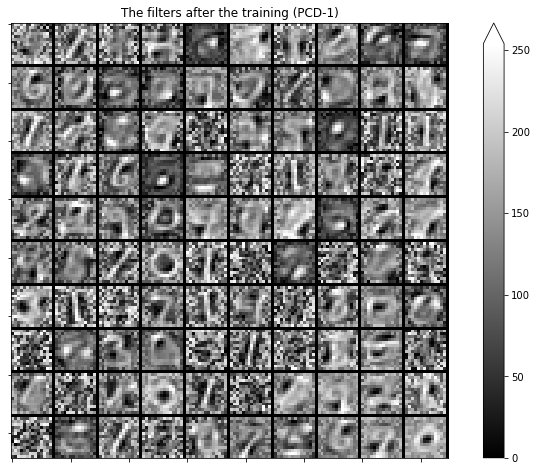

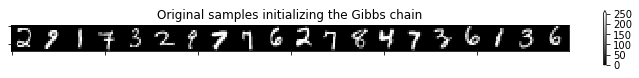

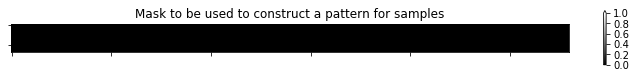

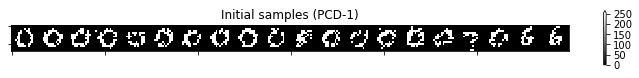

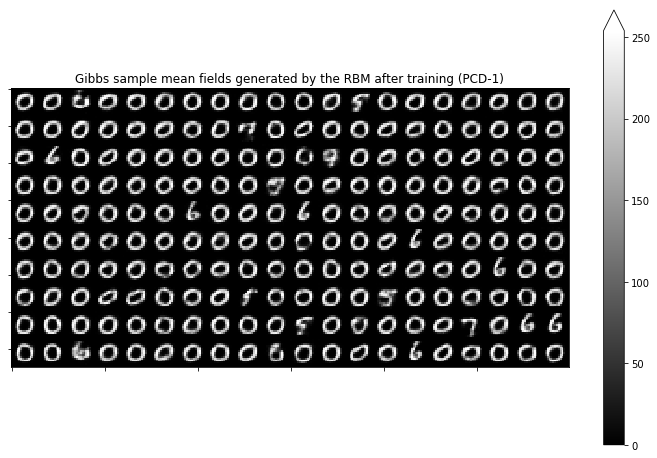

In [82]:
# PCD-1 sampling, without clamping
# select 'CD or PCD' to initialize the chain
initialize_chain = 'PCD'
n_Gibbs_steps = 1

print('PCD-1 sampling, without clamping')
rbmPCD1, filters = train_rbm(train_set_x, n_hidden, learning_rate,
                        batch_size, initialize_chain,
                        n_Gibbs_steps, training_epochs=10, 
                        output_folder='rbm_plots_PCD1_noclamp')
plot_image(filters, 'The filters after the training (PCD-1)')

original_samples, sample_mean_fields, clamping_mask, clamped_samples = test_rbm(
                                                               rbmPCD1, test_set_x, 
                                                               n_chains, n_samples, 
                                                               n_Gibbs_steps, 
                                                               plot_every, n_clamps, 
                                                               place=None)
plot_row(original_samples, 
         'Original samples initializing the Gibbs chain') 
plot_mask(clamping_mask, n_chains, 
          'Mask to be used to construct a pattern for samples')
plot_row(clamped_samples, 'Initial samples (PCD-1)')
plot_image(sample_mean_fields, 
           'Gibbs sample mean fields generated by the RBM after training (PCD-1)')

dataset has a dimension of 14 x 14
the monitoring cost will show the pseudo likelihood cost
Training epoch 0, cost is  -39.9192850652
Training epoch 1, cost is  -33.6796261658
Training epoch 2, cost is  -34.9535253537
Training epoch 3, cost is  -29.6042486487
Training epoch 4, cost is  -34.3607584438
Training epoch 5, cost is  -27.2448703196
Training epoch 6, cost is  -34.2846068728
Training epoch 7, cost is  -28.4397296756
Training epoch 8, cost is  -30.8958598453
Training epoch 9, cost is  -29.541971128
Training took 0.860816 minutes


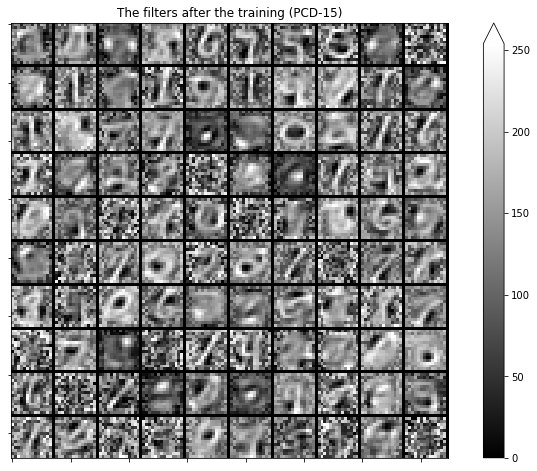

PCD-15 sampling, without clamping


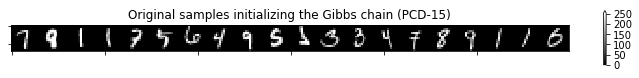

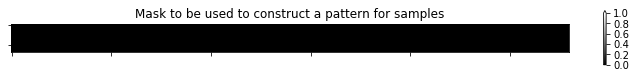

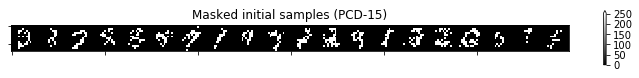

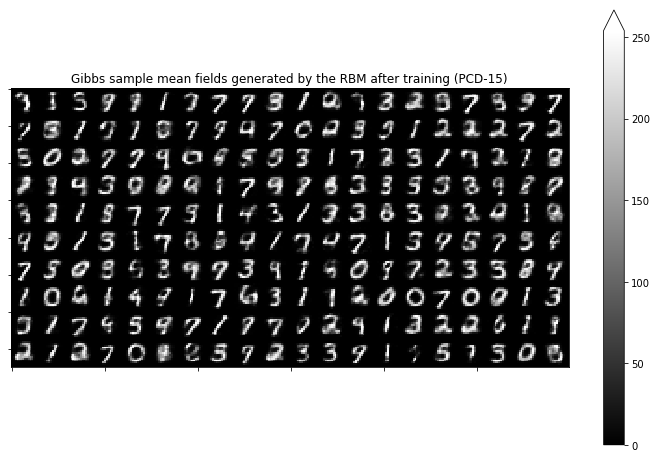

In [83]:
# PCD-15 sampling, without clamping
# select 'CD or PCD' to initialize the chain
initialize_chain = 'PCD'
n_Gibbs_steps = 15

rbmPCD15, filters = train_rbm(train_set_x, n_hidden, learning_rate,
                        batch_size, initialize_chain,
                        n_Gibbs_steps, training_epochs=10, 
                        output_folder='rbm_plots_PCD15_noclamp')
plot_image(filters, 'The filters after the training (PCD-15)')

print('PCD-15 sampling, without clamping')
original_samples, sample_mean_fields, clamping_mask, clamped_samples = test_rbm(
                                                               rbmPCD15, test_set_x, 
                                                               n_chains, n_samples, 
                                                               n_Gibbs_steps, 
                                                               plot_every, n_clamps, 
                                                               place=None)

plot_row(original_samples, 
         'Original samples initializing the Gibbs chain (PCD-15)') 
plot_mask(clamping_mask, n_chains, 
          'Mask to be used to construct a pattern for samples')
plot_row(clamped_samples, 
         'Masked initial samples (PCD-15)')
plot_image(sample_mean_fields, 
           'Gibbs sample mean fields generated by the RBM after training (PCD-15)')

#### <span style="color:red">Assignment Part 2: 
Although the demo code with results are ready to run for you, first try to understand the RBM.py class and explain a little bit why the results with CD-15 look better than with CD-1. Also, explain why PCD seems to have more converging results. Write your observations in the discussion cell below.

#### <span style="color:red">Assignment Part 3:
Now try different clamping methods by changing the *n_clamps* and the clamping *place* by using the best model found in the demo. Experiment with at least two of the clamping *place* (top, bottom, left, right, random) and with 2 different values for the *n_clamps*. (In total, you need to show results for at least four experiments). Can you see the resemblence between the forced pixels from the original samples initializing the Gibbs chain and "mean fields" generated by the RBM? What effects do the different clamping mask placements and total clamped pixels have? What might be the reason for such behaviours? Write your observations in the discussion cell below.

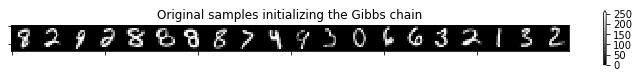

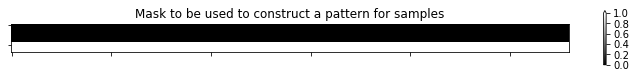

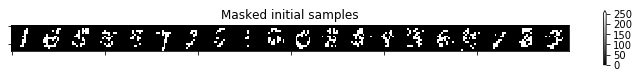

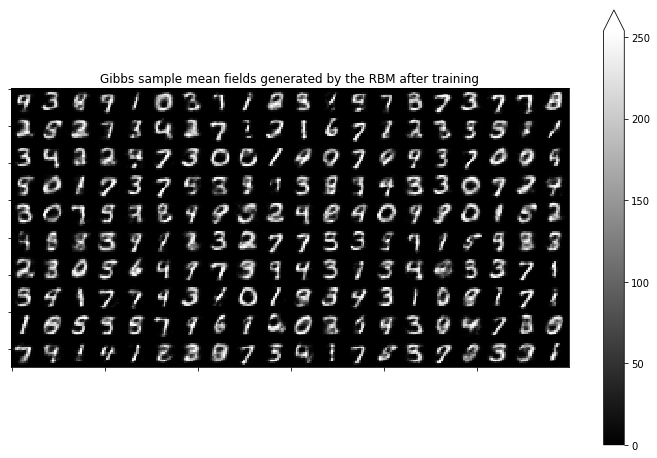

In [92]:
###################################################################
###################### INSERT YOUR CODE HERE ######################
###################################################################

# Hint: you can use test_rbm function the your best model 
# found in the demo. 
# use rbm model trained with the PCD-15 algorithm from the demo 
rbm = rbmPCD15

# then play with n_clamps and place for clamping
# perform and visualize the results with the functions given

n_clamps = 5
place = 'bottom'
original_samples, sample_mean_fields, clamping_mask, clamped_samples = test_rbm(rbm, test_set_x, 
                                                               n_chains, n_samples, 
                                                               n_Gibbs_steps, 
                                                               plot_every, n_clamps, 
                                                               place=place)
plot_row(original_samples, 'Original samples initializing the Gibbs chain') 
plot_mask(clamping_mask, n_chains, 'Mask to be used to construct a pattern for samples')
plot_row(clamped_samples, 'Masked initial samples')
plot_image(sample_mean_fields, 
           'Gibbs sample mean fields generated by the RBM after training') 

###################################################################
############################ END ##################################
###################################################################

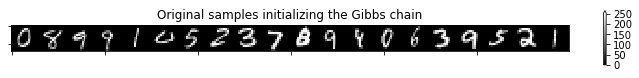

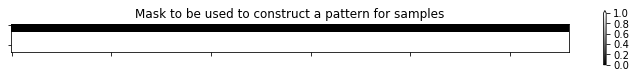

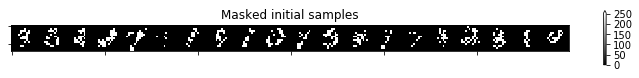

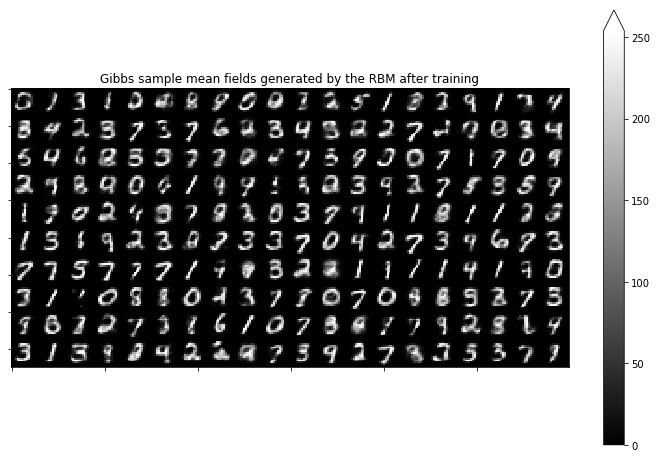

In [93]:
###################################################################
###################### INSERT YOUR CODE HERE ######################
###################################################################

# Hint: you can use test_rbm function the your best model 
# found in the demo. 
# use rbm model trained with the PCD-15 algorithm from the demo 
rbm = rbmPCD15

# then play with n_clamps and place for clamping
# perform and visualize the results with the functions given

n_clamps = 10
place = 'bottom'
original_samples, sample_mean_fields, clamping_mask, clamped_samples = test_rbm(rbm, test_set_x, 
                                                               n_chains, n_samples, 
                                                               n_Gibbs_steps, 
                                                               plot_every, n_clamps, 
                                                               place=place)
plot_row(original_samples, 'Original samples initializing the Gibbs chain') 
plot_mask(clamping_mask, n_chains, 'Mask to be used to construct a pattern for samples')
plot_row(clamped_samples, 'Masked initial samples')
plot_image(sample_mean_fields, 
           'Gibbs sample mean fields generated by the RBM after training') 

###################################################################
############################ END ##################################
###################################################################

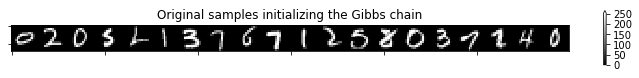

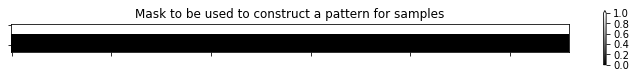

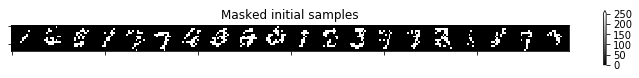

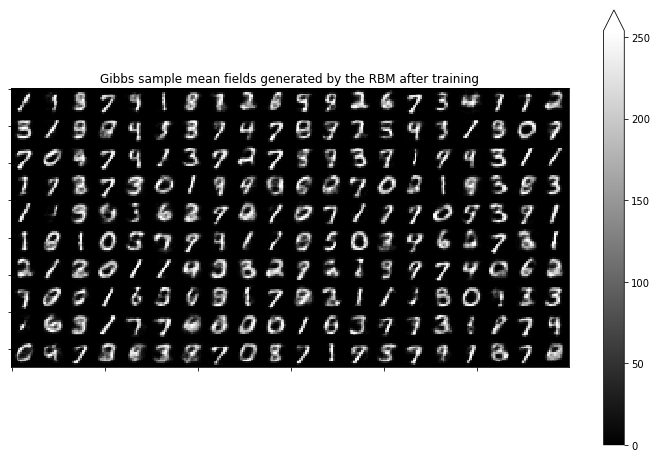

In [94]:
###################################################################
###################### INSERT YOUR CODE HERE ######################
###################################################################

# Hint: you can use test_rbm function the your best model 
# found in the demo. 
# use rbm model trained with the PCD-15 algorithm from the demo 
rbm = rbmPCD15

# then play with n_clamps and place for clamping
# perform and visualize the results with the functions given

n_clamps = 5
place = 'top'
original_samples, sample_mean_fields, clamping_mask, clamped_samples = test_rbm(rbm, test_set_x, 
                                                               n_chains, n_samples, 
                                                               n_Gibbs_steps, 
                                                               plot_every, n_clamps, 
                                                               place=place)
plot_row(original_samples, 'Original samples initializing the Gibbs chain') 
plot_mask(clamping_mask, n_chains, 'Mask to be used to construct a pattern for samples')
plot_row(clamped_samples, 'Masked initial samples')
plot_image(sample_mean_fields, 
           'Gibbs sample mean fields generated by the RBM after training') 

###################################################################
############################ END ##################################
###################################################################

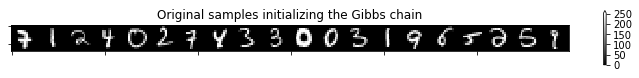

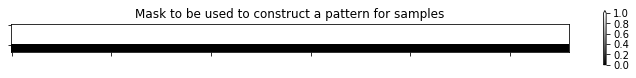

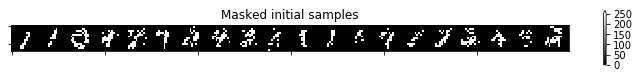

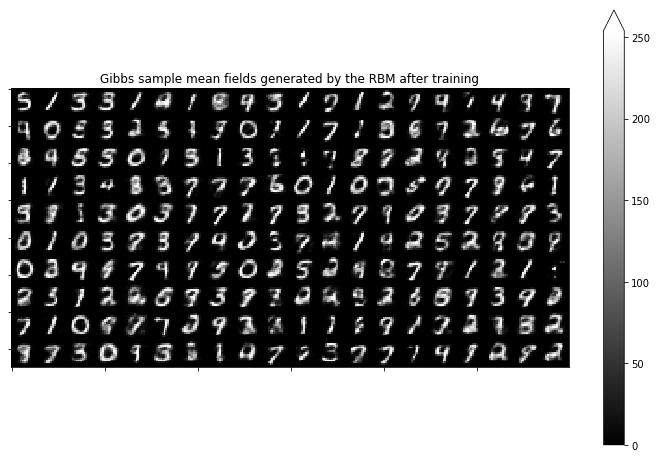

In [95]:
###################################################################
###################### INSERT YOUR CODE HERE ######################
###################################################################

# Hint: you can use test_rbm function the your best model 
# found in the demo. 
# use rbm model trained with the PCD-15 algorithm from the demo 
rbm = rbmPCD15

# then play with n_clamps and place for clamping
# perform and visualize the results with the functions given

n_clamps = 10
place = 'top'
original_samples, sample_mean_fields, clamping_mask, clamped_samples = test_rbm(rbm, test_set_x, 
                                                               n_chains, n_samples, 
                                                               n_Gibbs_steps, 
                                                               plot_every, n_clamps, 
                                                               place=place)
plot_row(original_samples, 'Original samples initializing the Gibbs chain') 
plot_mask(clamping_mask, n_chains, 'Mask to be used to construct a pattern for samples')
plot_row(clamped_samples, 'Masked initial samples')
plot_image(sample_mean_fields, 
           'Gibbs sample mean fields generated by the RBM after training') 

###################################################################
############################ END ##################################
###################################################################

#### <span style="color:red">Assignment Part 4:
Now, you will add noise to your masked (clamped) samples initializing the Gibbs chain. You need to fill the section in the *test_rbm( )* function to generate noise with a dimension of training data and sampled from the Bernoulli distribution. After completing the function, choose the clamping method with *n_clamps = 7* and place = *bottom* and experiment with all 3 noise generation methods. What effects did you see on the masked initial samples and the generated mean fields with different noise initialization methods? Comment on the results in the discussion part. 

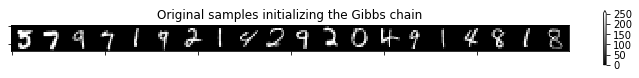

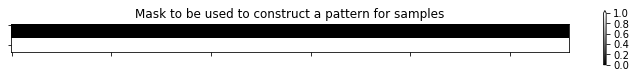

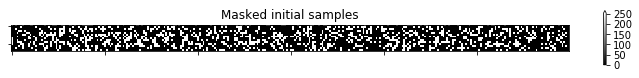

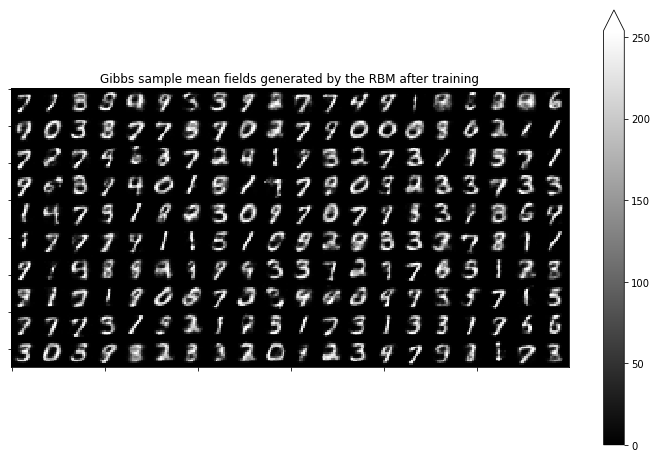

In [98]:
###################################################################
###################### INSERT YOUR CODE HERE ######################
###################################################################
# choose 'bottom' for the masking (clamping) place and set n_clamps to 7 pixels
n_clamps = 7
place = 'bottom'
rbm = rbmPCD15

# set train_data to train_set_x
# and test_data to test_set_x
train_data = train_set_x
test_data = test_set_x

#initialize noise_init with 'equal_expectation'/'global_expectation'/'local_expectation'
noise_init = 'equal_expectation'

# perform and visualize experiments using test_rbm() function
original_samples, sample_mean_fields, clamping_mask, clamped_samples = test_rbm(rbm, test_data,
                n_chains, n_samples, n_Gibbs_steps, plot_every, n_clamps, place, noise_init, train_data)


plot_row(original_samples, 'Original samples initializing the Gibbs chain') 
plot_mask(clamping_mask, n_chains, 'Mask to be used to construct a pattern for samples')
plot_row(clamped_samples, 'Masked initial samples')
plot_image(sample_mean_fields,            
           'Gibbs sample mean fields generated by the RBM after training')


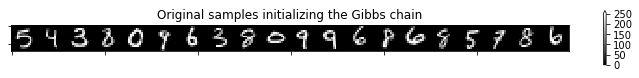

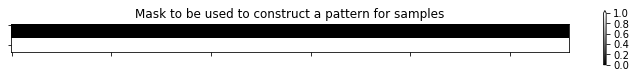

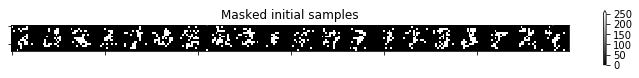

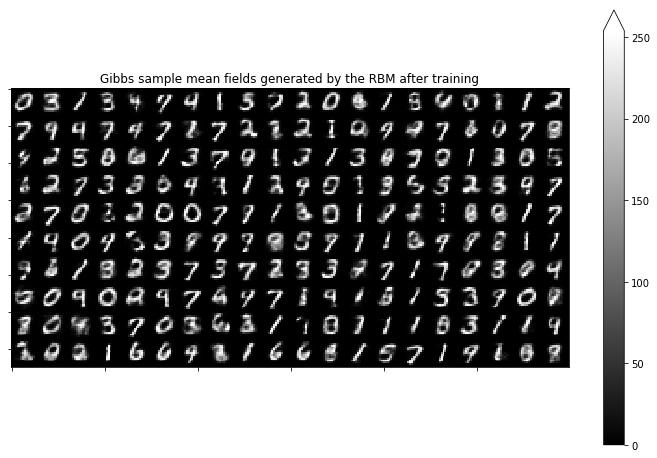

In [131]:
###################################################################
###################### INSERT YOUR CODE HERE ######################
###################################################################
# choose 'bottom' for the masking (clamping) place and set n_clamps to 7 pixels
n_clamps = 7
place = 'bottom'
rbm = rbmPCD15

# set train_data to train_set_x
# and test_data to test_set_x
train_data = train_set_x
test_data = test_set_x

#initialize noise_init with 'equal_expectation'/'global_expectation'/'local_expectation'
noise_init = 'global_expectation'

# perform and visualize experiments using test_rbm() function
original_samples, sample_mean_fields, clamping_mask, clamped_samples =test_rbm(rbm, test_data,n_chains, n_samples, n_Gibbs_steps, plot_every,
         n_clamps, place, noise_init, train_data)


plot_row(original_samples, 'Original samples initializing the Gibbs chain') 
plot_mask(clamping_mask, n_chains, 'Mask to be used to construct a pattern for samples')
plot_row(clamped_samples, 'Masked initial samples')
plot_image(sample_mean_fields,            
           'Gibbs sample mean fields generated by the RBM after training')

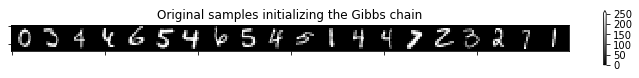

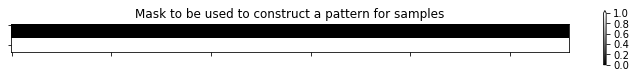

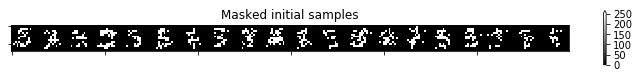

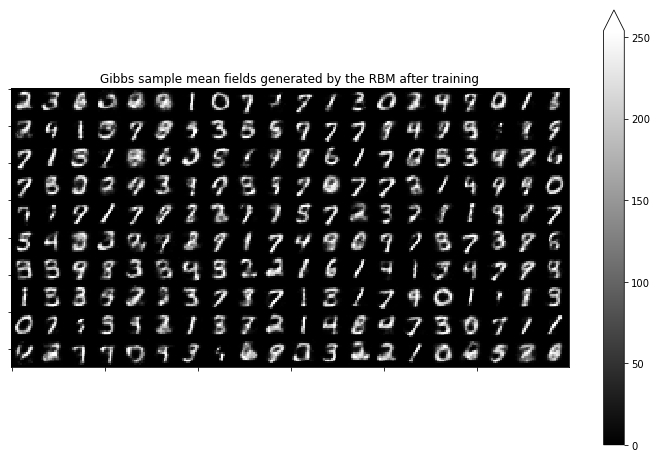

In [133]:
###################################################################
###################### INSERT YOUR CODE HERE ######################
###################################################################
# choose 'bottom' for the masking (clamping) place and set n_clamps to 7 pixels
n_clamps = 7
place = 'bottom'
rbm = rbmPCD15

# set train_data to train_set_x
# and test_data to test_set_x
train_data = train_set_x
test_data = test_set_x

#initialize noise_init with 'equal_expectation'/'global_expectation'/'local_expectation'
noise_init = 'local_expectation'

# perform and visualize experiments using test_rbm() function
original_samples, sample_mean_fields, clamping_mask, clamped_samples =test_rbm(rbm, test_data,n_chains, n_samples, n_Gibbs_steps, plot_every,
         n_clamps, place, noise_init, train_data)


plot_row(original_samples, 'Original samples initializing the Gibbs chain') 
plot_mask(clamping_mask, n_chains, 'Mask to be used to construct a pattern for samples')
plot_row(clamped_samples, 'Masked initial samples')
plot_image(sample_mean_fields,            
           'Gibbs sample mean fields generated by the RBM after training')

#### <span style="color:red"> Discussion

1) Since samples are obtained from Markov chain simulations, samples taken with more number of steps generally converge better towards the target distribution.

2) CD is much better in representing the the log-likelihood of the data so its better for sampling from the model  And PCD initializes a chain with negative samples from the last iteration. PCD explores better the entire domain of the input space, however CD just explores the regions near the training examples

3) From the tested models (bottom,top) with different clamping size, it is shown that it’s harder for an RBM to learn good data distributions if the visual layer is clamped. And the less clamped number is used, the better data distribution it learns. Though I did not test with random clipping but i think it will be more harder to learn.

4) Effect of noise is clearly visible on masked initial sample. The noise is maximum when it has equal expectation and minimum in case of expectation with local mean. Noisy data in the non-masked region of initial samples looks different for different noise models. For global expectation and equal expectation, Gibbs sample mean fields give
similar looking samples. In theory, "local expectation" should be the best out of these, because it is representing the actual pixel-wise probabilities of "ones". Global expectation is mixing the probability of "ones" across all pixel locations, it might not be better than the "equal expectation" but not the same as "local
expectation". Equal expectation appears to need more steps to converge to producing digitlooking
samples

In [113]:


def gibbs_vhv_clamped(self, v0_mean, v0_sample, mask):
        ###################################################################
        ###################### INSERT YOUR CODE HERE ######################
        ###################################################################
        # this function implements one step of Gibbs sampling,
        # starting from the visible state and also allows 
        # clamping for the v1_sample
        # Inputs:
        # sample for visible units and the clamping_mask to be used to mask
        # v1_sample's
        # hint 1: now the function is similar to the gibbs_vhv() function 
        # calculate v1_sample_clamped and v1_mean_clamped with the mask given
        # as input 
        # hint 2: return v1_sample_clamped and v1_mean_clamped instead of 
        # v1_sample and v1_mean
        m = v0_sample.shape[0]
        mask_tiled = T.tile(mask, (m,1))
        v1_sample = v0_sample * mask_tiled
        pre_sigmoid_h1, h1_mean, h1_sample = self.sample_h_given_v(V1_sample)
        pre_sigmoid_v1, v1_mean_clamped, v1_sample_clamped =
                                            self.sample_v_given_h(h1_sample)
        return [pre_sigmoid_h1, h1_mean, h1_sample,
                pre_sigmoid_v1, v1_mean_clamped, v1_sample_clamped]
        ###################################################################
        ############################ END ##################################
        ###################################################################